### Codes to read directly from Etherscan io using API Key
##### Put into dataframe
###### Add Method Column for Mint, Burn, Transfer, Swap and Withdraw
###### Calculate cummulative Mint, cummulative Burn and Cummulative Total
###### Plot Mint vs Burn
###### Plot Cumm Mint, Cumm Burn and Cumm Total

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
from pathlib import Path
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
from datetime import datetime  


# Import the API key
from config import etherscan_io_API_key

Find all the data pertaining to TFXC token address.

https://etherscan.io/token/0x4d9ad77b5f5d6032eafe2218b09edb3401ea2eef

Contract address:  0xAf5B874Cd35e946444b350820308280D7Be4Cd70

#### Codes to rerieve all the TFX data direct from Etherscan and put into dataframe

In [2]:
# Set the contract address
contractaddress = "0x4D9Ad77B5f5d6032eAfe2218B09edB3401ea2eEf"

# Set the parameters for the type of search
page = 1
offset = 3700
startblock = 0
endblock = 99999999
sort = "desc"

# set up a parameters dictionary
params = {
    "contractaddress": contractaddress,
    "page": page,
    "offset": offset,
    "startblock": startblock,
    "endblock": endblock,
    "sort": sort,
    "apikey": etherscan_io_API_key  # Make sure etherscan_io_API_key is defined
}

# Set base URL
base_url = "https://api.etherscan.io/api?module=account&action=tokentx"

# Construct the full URL
full_url = base_url + "&" + "&".join([f"{key}={value}" for key, value in params.items()])

# Make the GET request
tfx_url = requests.get(full_url)

# Convert the API response to JSON format
tfx = tfx_url.json()

# Extract the relevant data from the result list
transactions = tfx["result"]

# Create a list of dictionaries containing the relevant data
data_list = [
    {
        "Transaction_Hash": transaction["hash"],
        "Date": pd.to_datetime(int(transaction["timeStamp"]), unit='s'),
        "From": transaction["from"],
        "To": transaction["to"],
        "Quantity": float(transaction["value"]) / 10**6  # Convert value to float (assuming it's in wei)
    }
    for transaction in transactions
]

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(data_list)

# Print the DataFrame
df.head()

,Transaction_Hash,Date,From,To,Quantity
0,0xf75edd9a32f9a74a297eb219ba216555cd74c9a73fec...,2023-10-22 08:17:47,0x0000000000000000000000000000000000000000,0x9e238ee08297ee90a34ab61980a296d1768b7de6,964783.21
1,0x3c39f76dd224643af50632a3426cdac40a5b71ea9268...,2023-10-15 09:45:11,0x0000000000000000000000000000000000000000,0x9e238ee08297ee90a34ab61980a296d1768b7de6,2102431.31
2,0x9f2c192528eea5d5eb73b20f194f208a70fba4722df4...,2023-10-08 09:23:11,0x0000000000000000000000000000000000000000,0x9e238ee08297ee90a34ab61980a296d1768b7de6,1708222.19
3,0xa5236c7e38a0d522b76504fb0bd8813b38f3e401fa92...,2023-10-01 10:07:47,0x0000000000000000000000000000000000000000,0x9e238ee08297ee90a34ab61980a296d1768b7de6,2232532.29
4,0x56b563cdeb391980ddd2354d5d0725087ac306c952f7...,2023-09-24 11:20:11,0x0000000000000000000000000000000000000000,0x9e238ee08297ee90a34ab61980a296d1768b7de6,1944871.38


#### Code to create a new column Method and assign Mint, Burn, Swap, Withdraw and Execute base do conditions

In [3]:
# Define a function to determine the method based on "From" and "To" values
def determine_method(row):
    if row["From"] == "0x0000000000000000000000000000000000000000":
        return "Mint"
    elif row["To"] == "0x0000000000000000000000000000000000000000":
        return "Burn"
    elif row["From"] == "0x74de5d4FCbf63E00296fd95d33236B9794016631":
        return "Swap"    
    elif row["To"] == "0x74de5d4FCbf63E00296fd95d33236B9794016631":
        return "Swap"
    elif row["To"] == "0xA4Cd30D9af7844aB48165C42fAa755004A54ce2e":
        return "Withdraw"
    elif row["To"] == "0x64720B51B4e5439F994346a05f66C688A76e9324":
        return "Execute"
    else:
        return "Transfer"

# Create the "Method" column using the apply method
df["Method"] = df.apply(determine_method, axis=1)
df.head()

,Transaction_Hash,Date,From,To,Quantity,Method
0,0xf75edd9a32f9a74a297eb219ba216555cd74c9a73fec...,2023-10-22 08:17:47,0x0000000000000000000000000000000000000000,0x9e238ee08297ee90a34ab61980a296d1768b7de6,964783.21,Mint
1,0x3c39f76dd224643af50632a3426cdac40a5b71ea9268...,2023-10-15 09:45:11,0x0000000000000000000000000000000000000000,0x9e238ee08297ee90a34ab61980a296d1768b7de6,2102431.31,Mint
2,0x9f2c192528eea5d5eb73b20f194f208a70fba4722df4...,2023-10-08 09:23:11,0x0000000000000000000000000000000000000000,0x9e238ee08297ee90a34ab61980a296d1768b7de6,1708222.19,Mint
3,0xa5236c7e38a0d522b76504fb0bd8813b38f3e401fa92...,2023-10-01 10:07:47,0x0000000000000000000000000000000000000000,0x9e238ee08297ee90a34ab61980a296d1768b7de6,2232532.29,Mint
4,0x56b563cdeb391980ddd2354d5d0725087ac306c952f7...,2023-09-24 11:20:11,0x0000000000000000000000000000000000000000,0x9e238ee08297ee90a34ab61980a296d1768b7de6,1944871.38,Mint


#### Sort the dataframe by Date ascending order prior to cummulative calculation for Mint and Burn

In [4]:
df = df.sort_values(by='Date', ascending=True)
df.head()

,Transaction_Hash,Date,From,To,Quantity,Method
40,0x9d3877e240d05fa4c21c212d00f9f7fbc503823fad2e...,2023-04-04 11:33:23,0x0000000000000000000000000000000000000000,0x9e238ee08297ee90a34ab61980a296d1768b7de6,0.00,Mint
39,0xc323de733e817a7b8370b9e43b6a10f03e6c99523abb...,2023-04-11 02:47:35,0x0000000000000000000000000000000000000000,0x9e238ee08297ee90a34ab61980a296d1768b7de6,100.00,Mint
38,0xcbc61c8b62a87751b1c80cecd5c413c087e21e547487...,2023-04-11 08:52:23,0x0000000000000000000000000000000000000000,0x9e238ee08297ee90a34ab61980a296d1768b7de6,100.00,Mint
37,0xb1b58722fe297d1217f0c4c638d66506eb3abf72463a...,2023-04-16 16:03:23,0x0000000000000000000000000000000000000000,0x9e238ee08297ee90a34ab61980a296d1768b7de6,4682731.58,Mint
36,0xf0de7bca78542021839279e4cf26c17cd57dbbe9bef3...,2023-04-17 06:21:11,0x9e238ee08297ee90a34ab61980a296d1768b7de6,0xa4cd30d9af7844ab48165c42faa755004a54ce2e,2341365.79,Transfer


#### Create a new Column Cumm_Mint and Calculate the Cummulative Mint based on Method == "Mint"

In [5]:
# Initialize a variable to keep track of the cumulative sum for Mint transactions
cumulative_mint = 0

# Create a new column "Cumm_Mint" and initialize it with NaN
df['Cumm_Mint'] = float('nan')

# Calculate the cumulative sum of "Quantity" for rows where "Method" is "Mint"
for index, row in df.iterrows():
    if row['Method'] == 'Mint':
        cumulative_mint += row['Quantity']
    df.at[index, 'Cumm_Mint'] = cumulative_mint

# Forward fill NaN values in the "Cumm_Mint" column with the last valid value
df['Cumm_Mint'].fillna(method='ffill', inplace=True)
df.head()

,Transaction_Hash,Date,From,To,Quantity,Method,Cumm_Mint
40,0x9d3877e240d05fa4c21c212d00f9f7fbc503823fad2e...,2023-04-04 11:33:23,0x0000000000000000000000000000000000000000,0x9e238ee08297ee90a34ab61980a296d1768b7de6,0.00,Mint,0.00
39,0xc323de733e817a7b8370b9e43b6a10f03e6c99523abb...,2023-04-11 02:47:35,0x0000000000000000000000000000000000000000,0x9e238ee08297ee90a34ab61980a296d1768b7de6,100.00,Mint,100.00
38,0xcbc61c8b62a87751b1c80cecd5c413c087e21e547487...,2023-04-11 08:52:23,0x0000000000000000000000000000000000000000,0x9e238ee08297ee90a34ab61980a296d1768b7de6,100.00,Mint,200.00
37,0xb1b58722fe297d1217f0c4c638d66506eb3abf72463a...,2023-04-16 16:03:23,0x0000000000000000000000000000000000000000,0x9e238ee08297ee90a34ab61980a296d1768b7de6,4682731.58,Mint,4682931.58
36,0xf0de7bca78542021839279e4cf26c17cd57dbbe9bef3...,2023-04-17 06:21:11,0x9e238ee08297ee90a34ab61980a296d1768b7de6,0xa4cd30d9af7844ab48165c42faa755004a54ce2e,2341365.79,Transfer,4682931.58


#### Create a new Column Cumm_Burn and Calculate the Cummulative Burn based on Method == "Burn"

In [6]:
# Initialize a variable to keep track of the cumulative sum for Mint transactions
cumulative_burn = 0

# Create a new column "Cumm_Mint" and initialize it with NaN
df['Cumm_Burn'] = float('nan')

# Calculate the cumulative sum of "Quantity" for rows where "Method" is "Mint"
for index, row in df.iterrows():
    if row['Method'] == 'Burn':
        cumulative_burn += row['Quantity']
    df.at[index, 'Cumm_Burn'] = cumulative_burn

# Forward fill NaN values in the "Cumm_Mint" column with the last valid value
df['Cumm_Burn'].fillna(method='ffill', inplace=True)
df.head()

,Transaction_Hash,Date,From,To,Quantity,Method,Cumm_Mint,Cumm_Burn
40,0x9d3877e240d05fa4c21c212d00f9f7fbc503823fad2e...,2023-04-04 11:33:23,0x0000000000000000000000000000000000000000,0x9e238ee08297ee90a34ab61980a296d1768b7de6,0.00,Mint,0.00,0.0
39,0xc323de733e817a7b8370b9e43b6a10f03e6c99523abb...,2023-04-11 02:47:35,0x0000000000000000000000000000000000000000,0x9e238ee08297ee90a34ab61980a296d1768b7de6,100.00,Mint,100.00,0.0
38,0xcbc61c8b62a87751b1c80cecd5c413c087e21e547487...,2023-04-11 08:52:23,0x0000000000000000000000000000000000000000,0x9e238ee08297ee90a34ab61980a296d1768b7de6,100.00,Mint,200.00,0.0
37,0xb1b58722fe297d1217f0c4c638d66506eb3abf72463a...,2023-04-16 16:03:23,0x0000000000000000000000000000000000000000,0x9e238ee08297ee90a34ab61980a296d1768b7de6,4682731.58,Mint,4682931.58,0.0
36,0xf0de7bca78542021839279e4cf26c17cd57dbbe9bef3...,2023-04-17 06:21:11,0x9e238ee08297ee90a34ab61980a296d1768b7de6,0xa4cd30d9af7844ab48165c42faa755004a54ce2e,2341365.79,Transfer,4682931.58,0.0


#### Calculate the Total = Cummulative Mint minus Cummulative Burn

In [7]:
# Create a new column "Total" as the difference between "Cumm_Mint" and "Cumm_Burn"
df['Total'] = df['Cumm_Mint'] - df['Cumm_Burn']
df.head()

,Transaction_Hash,Date,From,To,Quantity,Method,Cumm_Mint,Cumm_Burn,Total
40,0x9d3877e240d05fa4c21c212d00f9f7fbc503823fad2e...,2023-04-04 11:33:23,0x0000000000000000000000000000000000000000,0x9e238ee08297ee90a34ab61980a296d1768b7de6,0.00,Mint,0.00,0.0,0.00
39,0xc323de733e817a7b8370b9e43b6a10f03e6c99523abb...,2023-04-11 02:47:35,0x0000000000000000000000000000000000000000,0x9e238ee08297ee90a34ab61980a296d1768b7de6,100.00,Mint,100.00,0.0,100.00
38,0xcbc61c8b62a87751b1c80cecd5c413c087e21e547487...,2023-04-11 08:52:23,0x0000000000000000000000000000000000000000,0x9e238ee08297ee90a34ab61980a296d1768b7de6,100.00,Mint,200.00,0.0,200.00
37,0xb1b58722fe297d1217f0c4c638d66506eb3abf72463a...,2023-04-16 16:03:23,0x0000000000000000000000000000000000000000,0x9e238ee08297ee90a34ab61980a296d1768b7de6,4682731.58,Mint,4682931.58,0.0,4682931.58
36,0xf0de7bca78542021839279e4cf26c17cd57dbbe9bef3...,2023-04-17 06:21:11,0x9e238ee08297ee90a34ab61980a296d1768b7de6,0xa4cd30d9af7844ab48165c42faa755004a54ce2e,2341365.79,Transfer,4682931.58,0.0,4682931.58


#### Export to csv file

In [8]:
# Export the DataFrame to a CSV file
df.to_csv('Resources/MAQ.csv', index=False)

### Plot 1: Cummulative Mint, Cummulative Burn and Total over time

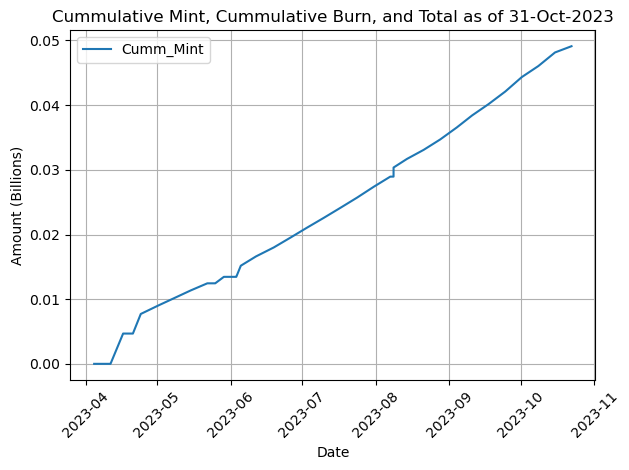

In [9]:
# Assuming you have a DataFrame named df with "Date," "Cumm_Mint," "Cumm_Burn," and "Total" columns

# Create a line plot for Cumm_Mint (in billions)
plt.plot(df['Date'], df['Cumm_Mint'] / 1e9, label='Cumm_Mint', linestyle='-')

# Create a line plot for Cumm_Burn (in billions)
#

# Create a line plot for Total (in billions)
#

# Set y-axis limits if needed
# plt.ylim(min_value, max_value)

# Get the current date and format it as desired
current_date = datetime.now().strftime('%d-%b-%Y')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Amount (Billions)')  # Update the y-axis label

# Include the current date in the title
plt.title(f'Cummulative Mint, Cummulative Burn, and Total as of {current_date}')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


#####  Key Observations:
- TFX coin was minted on 4-Dec-22 at 10.48bil.  
- On May-2023, 2.9bil was burned and transferred to TFXC.
- since TFXC creation, TFX Total has started to reduce.

### Plot 2: Mint vs Burn over time

In [10]:
# Filter rows where Method is "Mint" and sum the Quantity column
mint_sum = df.loc[df["Method"] == "Mint", "Quantity"].sum()
mint_sum

49115414.51

In [11]:
# Filter rows where Method is "Mint" and sum the Quantity column
burn_sum = df.loc[df["Method"] == "Burn", "Quantity"].sum()
burn_sum

1580746.03

In [12]:
Total = round((mint_sum - burn_sum)/1000000000,2)
Total

0.05

In [13]:
# Filter rows where Method is "Mint" and sum the Quantity column
transfer_sum = df.loc[df["Method"] == "Transfer", "Quantity"].sum()
transfer_sum

2349600.91

In [14]:
# Filter rows where Method is "Mint" and sum the Quantity column
swap = df.loc[df["Method"] == "Swap", "Quantity"].sum()
swap

0.0

In [15]:
# Filter rows where Method is "Mint" and sum the Quantity column
execute = df.loc[df["Method"] == "Execute", "Quantity"].sum()
execute

0.0

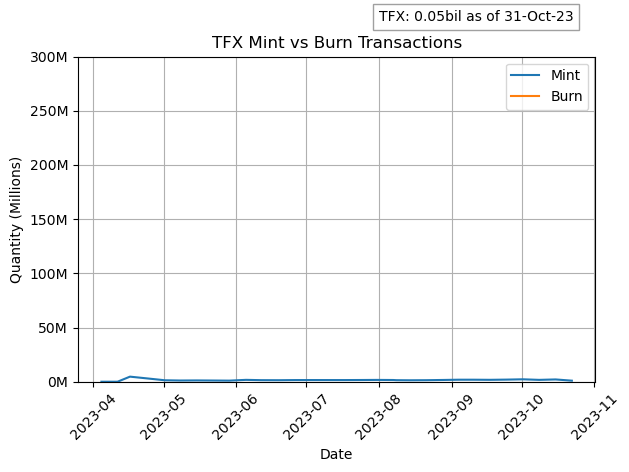

In [16]:
# Filter rows for Mint transactions
mint_df = df[df["Method"] == "Mint"]

# Filter rows for Burn transactions
burn_df = df[df["Method"] == "Burn"]

# Create a dot chart for Mint transactions
plt.plot(mint_df["Date"], mint_df["Quantity"] / 1000000, label="Mint", linestyle='-')

# Create a dot chart for Burn transactions
plt.plot(burn_df["Date"], burn_df["Quantity"] / 1000000, label="Burn", linestyle='-')

# Set y-axis limits from 0 to 300 (in millions)
plt.ylim(0, 300)

# Add labels and legend
plt.xlabel("Date")
plt.ylabel("Quantity (Millions)")
plt.title("TFX Mint vs Burn Transactions")
plt.legend()

# Format the y-axis labels to display values in millions
def millions_formatter(x, pos):
    return f"{x:.0f}M"

formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot

# Add the text annotation
current_date = datetime.now().strftime("%d-%b-%y")
text = f"TFX: {Total}bil as of {current_date}"
plt.text(0.6, 0.95, text, transform=plt.gcf().transFigure, fontsize=10,
         bbox=dict(facecolor='white', alpha=0.75, edgecolor='gray'))

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Plotting all the data

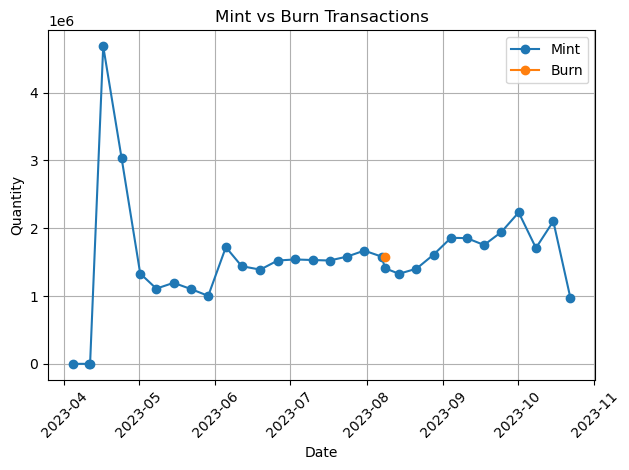

In [17]:
# Filter rows for Mint transactions
mint_df = df[df["Method"] == "Mint"]

# Filter rows for Burn transactions
burn_df = df[df["Method"] == "Burn"]

# Create a line chart for Mint transactions
plt.plot(mint_df["Date"], mint_df["Quantity"], label="Mint", marker='o', linestyle='-')

# Create a line chart for Burn transactions
plt.plot(burn_df["Date"], burn_df["Quantity"], label="Burn", marker='o', linestyle='-')

# Add labels and legend
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.title("Mint vs Burn Transactions")
plt.legend()

# Show the plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
burn_df

,Transaction_Hash,Date,From,To,Quantity,Method,Cumm_Mint,Cumm_Burn,Total
12,0xe65641bfb92494dc3341441923cf39536e2d53bdbef1...,2023-08-08 11:06:23,0x9e238ee08297ee90a34ab61980a296d1768b7de6,0x0000000000000000000000000000000000000000,1580746.03,Burn,28948908.67,1580746.03,27368162.64


In [19]:
# Export the DataFrame to a CSV file
burn_df.to_csv('Resources/TFX_burn.csv', index=False)